In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel file
df = pd.read_excel('/content/healthcare.xlsx')

# Display the DataFrame
print(df.head(10))  # Display the first 10 rows of the dataset

   Patient Id  Age  Gender Admission Date Discharge Date      Diagnosis  \
0           1   25    Male     2023-01-01     2023-01-05       Diabetes   
1           2   60  Female     2023-01-02     2023-01-12  Heart Disease   
2           3   45    Male     2023-01-03     2023-01-07      Infection   
3           4   33  Female     2023-01-04     2023-01-14         Injury   
4           5   72    Male     2023-01-05     2023-01-18  Heart Disease   
5           6   55  Female     2023-01-06     2023-01-10       Diabetes   
6           7   29    Male     2023-01-07     2023-01-11      Infection   
7           8   40  Female     2023-01-08     2023-01-13         Injury   
8           9   66    Male     2023-01-09     2023-01-23  Heart Disease   
9          10   38  Female     2023-01-10     2023-01-15       Diabetes   

   Treatment Cost  Length of Stay Readmission within 30 days  
0            1500               4                         No  
1            7500              10               

In [ ]:
# Perform basic analytics and visualizations

# Basic statistics
print(df.describe())  # Print basic statistics of the dataset

       Patient Id        Age       Admission Date       Discharge Date  \
count    10.00000  10.000000                   10                   10   
mean      5.50000  46.300000  2023-01-05 12:00:00  2023-01-12 19:12:00   
min       1.00000  25.000000  2023-01-01 00:00:00  2023-01-05 00:00:00   
25%       3.25000  34.250000  2023-01-03 06:00:00  2023-01-10 06:00:00   
50%       5.50000  42.500000  2023-01-05 12:00:00  2023-01-12 12:00:00   
75%       7.75000  58.750000  2023-01-07 18:00:00  2023-01-14 18:00:00   
max      10.00000  72.000000  2023-01-10 00:00:00  2023-01-23 00:00:00   
std       3.02765  16.166151                  NaN                  NaN   

       Treatment Cost  Length of Stay  
count       10.000000       10.000000  
mean      5440.000000        7.300000  
min       1500.000000        4.000000  
25%       3525.000000        4.000000  
50%       5600.000000        5.000000  
75%       7175.000000       10.000000  
max       9100.000000       14.000000  
std       251

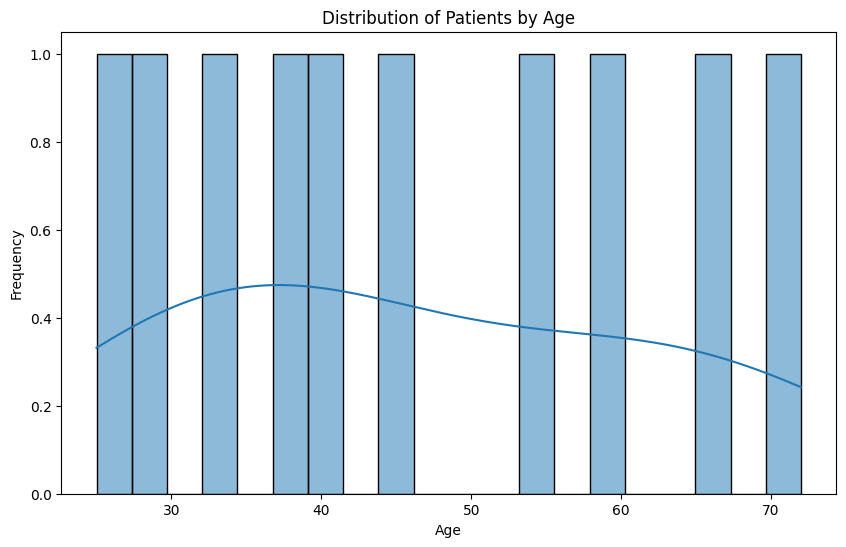

In [ ]:
# Distribution of patients by age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Patients by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()  # Plot the age distribution of patients

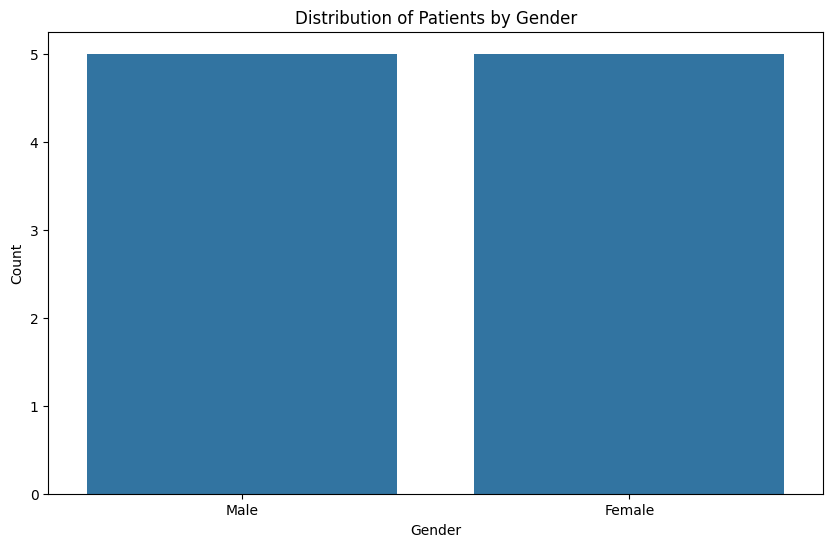

In [ ]:

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()  # Plot the gender distribution of patients


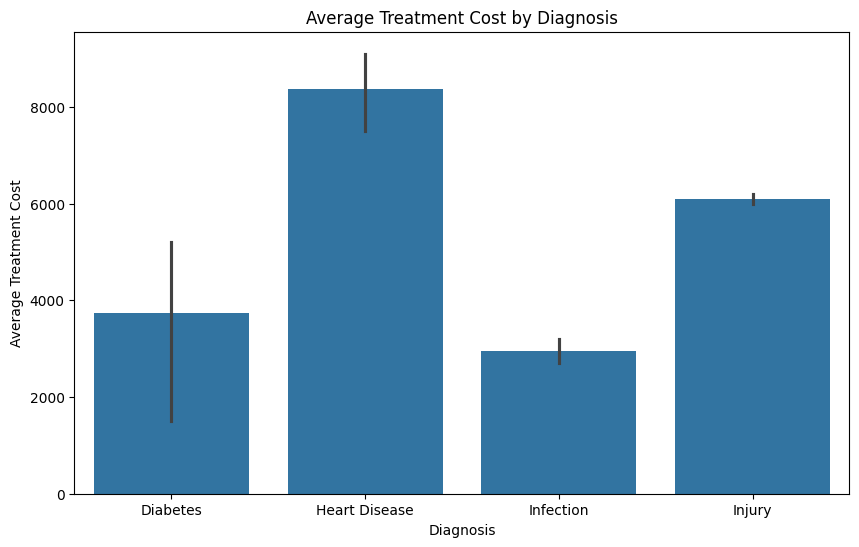

In [ ]:

# Average treatment cost by diagnosis
plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='Treatment Cost', data=df, estimator=np.mean)
plt.title('Average Treatment Cost by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Treatment Cost')
plt.show()  # Plot the average treatment cost by diagnosis

In [ ]:
# Readmission rate
readmission_rate = df['Readmission within 30 days'].value_counts(normalize=True) * 100
print("Readmission Rate:\n", readmission_rate)  # Calculate and print the readmission rate


Readmission Rate:
 Readmission within 30 days
No     70.0
Yes    30.0
Name: proportion, dtype: float64


In [ ]:
# Identify key metrics and insights

# Average length of stay by diagnosis
avg_length_of_stay = df.groupby('Diagnosis')['Length of Stay'].mean()
print("Average Length of Stay by Diagnosis:\n", avg_length_of_stay)  # Calculate and print the average length of stay by diagnosis


Average Length of Stay by Diagnosis:
 Diagnosis
Diabetes          4.333333
Heart Disease    12.333333
Infection         4.000000
Injury            7.500000
Name: Length of Stay, dtype: float64


In [ ]:
# Correlation between age and treatment cost
correlation = df[['Age', 'Treatment Cost']].corr()
print("Correlation between Age and Treatment Cost:\n", correlation)  # Calculate and print the correlation between age and treatment cost



Correlation between Age and Treatment Cost:
                      Age  Treatment Cost
Age             1.000000        0.815731
Treatment Cost  0.815731        1.000000


In [ ]:
# Readmission rates by diagnosis
readmission_by_diagnosis = df.groupby('Diagnosis')['Readmission within 30 days'].value_counts(normalize=True) * 100
print("Readmission Rates by Diagnosis:\n", readmission_by_diagnosis)  # Calculate and print the readmission rates by diagnosis

Readmission Rates by Diagnosis:
 Readmission within 30 days     No    Yes
Diagnosis                               
Diabetes                    100.0    NaN
Heart Disease                 NaN  100.0
Infection                   100.0    NaN
Injury                      100.0    NaN


In [ ]:
# Define a function to calculate risk score

#custom algorithm for the risk score prediction

def calculate_risk_score(row):
    # Base risk score on age, length of stay, and readmission status
    age_factor = row['Age'] / 100
    stay_factor = row['Length of Stay'] / 10
    readmission_factor = 1 if row['Readmission within 30 days'] == 'Yes' else 0
    diagnosis_factor = 0.1 if row['Diagnosis'] == 'Heart Disease' else 0.05  # Heart Disease has a higher risk

    # Composite risk score
    risk_score = age_factor + stay_factor + readmission_factor + diagnosis_factor
    return risk_score

# Apply the function to each row in the dataframe
df['Risk Score'] = df.apply(calculate_risk_score, axis=1)

# Display the dataframe with the new Risk Score column
print(df.head(10))

   Patient Id  Age  Gender Admission Date Discharge Date      Diagnosis  \
0           1   25    Male     2023-01-01     2023-01-05       Diabetes   
1           2   60  Female     2023-01-02     2023-01-12  Heart Disease   
2           3   45    Male     2023-01-03     2023-01-07      Infection   
3           4   33  Female     2023-01-04     2023-01-14         Injury   
4           5   72    Male     2023-01-05     2023-01-18  Heart Disease   
5           6   55  Female     2023-01-06     2023-01-10       Diabetes   
6           7   29    Male     2023-01-07     2023-01-11      Infection   
7           8   40  Female     2023-01-08     2023-01-13         Injury   
8           9   66    Male     2023-01-09     2023-01-23  Heart Disease   
9          10   38  Female     2023-01-10     2023-01-15       Diabetes   

   Treatment Cost  Length of Stay Readmission within 30 days  Risk Score  
0            1500               4                         No        0.70  
1            7500       

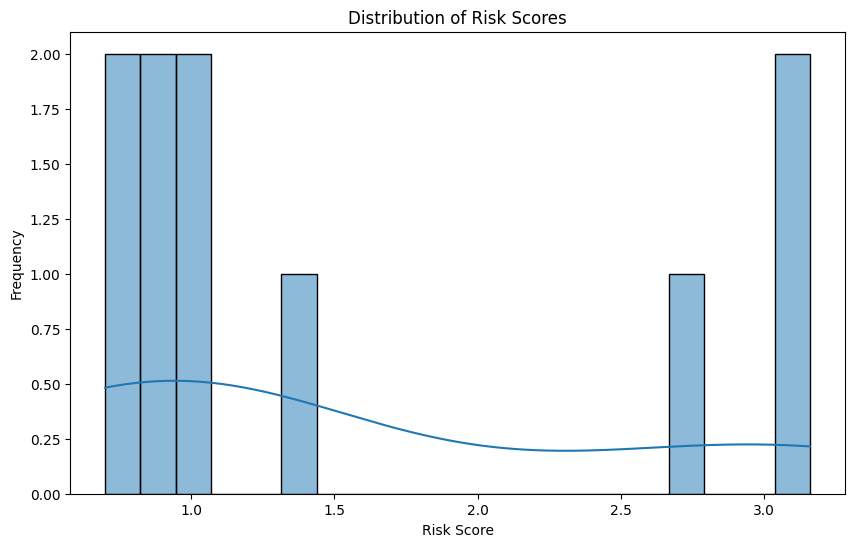

In [ ]:
# Plot the distribution of risk scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Risk Score'], bins=20, kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

In [1]:
# Calculate the percentage of high-risk patients (Risk Score > 0.5)
high_risk_patients = df[df['Risk Score'] > 1]
high_risk_percentage = len(high_risk_patients) / len(df) * 100

print(f"Percentage of high-risk patients: {high_risk_percentage:.2f}%")

NameError: name 'df' is not defined

In [ ]:
# Identify departments needing more resources based on diagnosis
resource_allocation = df.groupby('Diagnosis')['Risk Score'].mean().sort_values(ascending=False)
print("Average Risk Score by Diagnosis:\n", resource_allocation)

Average Risk Score by Diagnosis:
 Diagnosis
Heart Disease    2.993333
Injury           1.165000
Diabetes         0.876667
Infection        0.820000
Name: Risk Score, dtype: float64


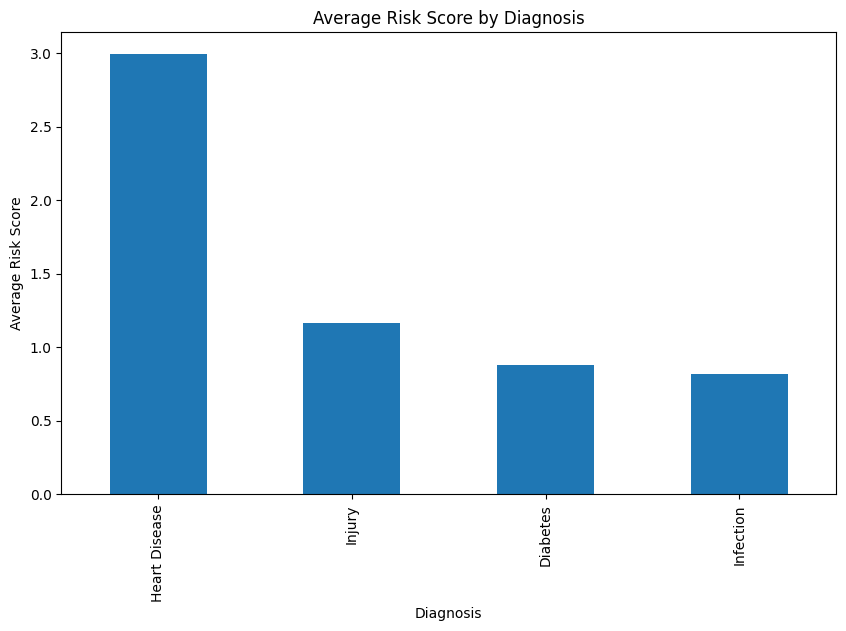

In [ ]:
# Visualize resource allocation needs
plt.figure(figsize=(10, 6))
resource_allocation.plot(kind='bar')
plt.title('Average Risk Score by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Risk Score')
plt.show()

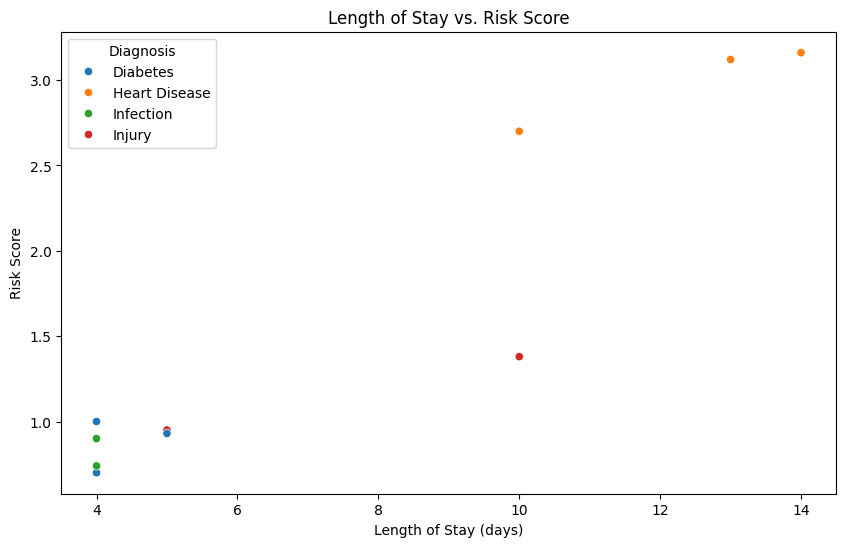

In [ ]:
# Visualize length of stay by risk score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length of Stay', y='Risk Score', data=df, hue='Diagnosis')
plt.title('Length of Stay vs. Risk Score')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Risk Score')
plt.legend(title='Diagnosis')
plt.show()

In [ ]:

# Generate a report summarizing key findings
report = {
    'High-Risk Percentage': high_risk_percentage,
    'Resource Allocation Needs': resource_allocation.to_dict(),
    'Correlation Age and Treatment Cost': df[['Age', 'Treatment Cost']].corr().iloc[0,1]
}

print("Healthcare Optimization Report:")
for key, value in report.items():
    print(f"{key}: {value}")

Healthcare Optimization Report:
High-Risk Percentage: 100.0
Resource Allocation Needs: {'Heart Disease': 2.9933333333333336, 'Injury': 1.165, 'Diabetes': 0.8766666666666668, 'Infection': 0.8200000000000001}
Correlation Age and Treatment Cost: 0.8157306014080488
